In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import product
import os
import sys

sys.path.insert(0, "src/")
sys.path.insert(0, "scripts/")

from onset.utilities.plot_reconfig_time import read_result_val


plt.rc("font", size=15)
import seaborn as sns

SIM_HOME = "/home/mhall/topology-programming"
RES_FOLDER = "data/archive/tdsc-multi_attack/results"
os.chdir(SIM_HOME)

# Results for multi-link, multi-target attacks on Sprint

In [8]:
def export_legend(legend, filename="legend"):
    fig = legend.figure
    fig.canvas.draw()
    bbox = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename + ".pdf", dpi="figure", bbox_inches=bbox)


# export_legend(my_legend, figurename + "_legend")
# plt.legend().remove()


def set_patches(bar, patches):
    for i, thisbar in enumerate(bar.patches):
        # print(thisbar)
        # Set a different hatch for each bar
        # first set
        if i < 15:
            thisbar.set_hatch(patches[0])
        elif i < 30:
            thisbar.set_hatch(patches[1])
        elif i < 45:
            thisbar.set_hatch(patches[2])
        else:
            thisbar.set_hatch(patches[3])

In [17]:
# sys.path.append(os.path.abspath("/home/mhall/network_stability_sim/"))
# sys.path.append(os.path.abspath("/home/mhall/network_stability_sim/src"))
# sys.path.append(os.path.abspath("/home/mhall/network_stability_sim/src/utilities"))
networks = ["ANS", "CRL", "sprint", "bellCanada", "surfNet"]
n_link = ["1", "2", "3", "4", "5"]
volume = ["100", "150", "200"]
method = ["ecmp", "mcf"]
ftx_strategy = ["max"]

frames = {network: pd.DataFrame() for network in networks}
base_folder = os.path.join(SIM_HOME, RES_FOLDER)

In [18]:
print(os.path.join(base_folder, f"{net}_optimal_{n}_link_attack_max_static_2_onset_v3_max_1_0Gbps-{vol}Gbps_-{m}_100"))
print(
    "/home/mhall/topology-programming/data/archive/tdsc-multi_attack/results/ANS_optimal_1_link_attack_max_static_2_onset_v3_max_1_0Gbps-100Gbps_-ecmp_100"
)
# print("ANS_optimal_1_link_attack_max_static_2_onset_v3_max_1_0Gbps-100Gbps_-ecmp_100")

/home/mhall/topology-programming/data/archive/tdsc-multi_attack/results/ANS_optimal_1_link_attack_max_static_2_onset_v3_max_1_0Gbps-100Gbps_-ecmp_100
/home/mhall/topology-programming/data/archive/tdsc-multi_attack/results/ANS_optimal_1_link_attack_max_static_2_onset_v3_max_1_0Gbps-100Gbps_-ecmp_100


In [20]:
for i, x in enumerate(product(networks, volume, n_link, method)):
    # print(net, vol, n, m)
    net, vol, n, m = x
    exp_file = os.path.join(
        base_folder, f"{net}_optimal_{n}_link_attack_max_static_2_onset_v3_max_1_0Gbps-{vol}Gbps_-{m}_100"
    )
    # print("verifying", exp_file)
    assert os.path.exists(exp_file)

    base_congestion_file = os.path.join(exp_file, f"{net}_0-0-2_1_0_0_0_Gbps_10", "MaxExpCongestionVsIterations.dat")
    base_loss_file = os.path.join(exp_file, f"{net}_1-0-2_1_0_0_0_Gbps_10", "CongestionLossVsIterations.dat")
    base_throughput = os.path.join(exp_file, f"{net}_0-0-2_1_0_0_0_Gbps_10", "TotalThroughputVsIterations.dat")
    onset_congestion_file = os.path.join(exp_file, f"{net}_1-0-2_1_0_0_0_Gbps_10", "MaxExpCongestionVsIterations.dat")
    onset_loss_file = os.path.join(exp_file, f"{net}_0-0-2_1_0_0_0_Gbps_10", "CongestionLossVsIterations.dat")
    onset_throughput_file = os.path.join(exp_file, f"{net}_1-0-2_1_0_0_0_Gbps_10", "TotalThroughputVsIterations.dat")

    base_congestion_value = read_result_val(base_congestion_file)
    base_loss_value = read_result_val(base_loss_file)
    base_throughput_value = read_result_val(base_throughput)

    onset_congestion_value = read_result_val(onset_congestion_file)
    onset_loss_value = read_result_val(onset_loss_file)
    onset_throughput_value = read_result_val(onset_throughput_file)

    base_df = pd.DataFrame(
        {
            "Attack": "{}x{}".format(n, vol),
            "links": n,
            "volume": vol,
            "Defense": m.upper(),
            "Congestion": base_congestion_value,
            "Loss": base_loss_value,
            "Throughput": base_throughput_value,
        },
        index=[2 * i],
    )

    onset_df = pd.DataFrame(
        {
            "Attack": "{}x{}".format(n, vol),
            "links": n,
            "volume": vol,
            "Defense": m.upper() + "+ONSET",
            "Congestion": onset_congestion_value,
            "Loss": onset_loss_value,
            "Throughput": onset_throughput_value,
        },
        index=[2 * i + 1],
    )

    frames[net] = pd.concat([frames[net], base_df, onset_df])

/tmp/ipykernel_556421/3860285933.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_0 = sns.barplot(


NameError: name 'patches' is not defined

<Figure size 640x480 with 0 Axes>

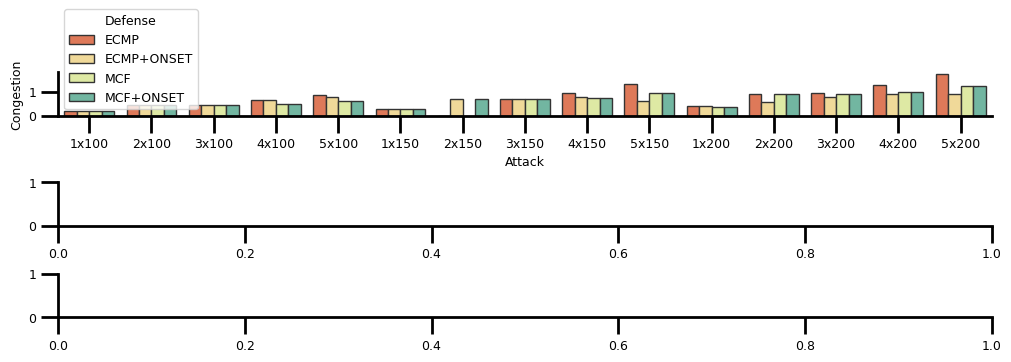

In [23]:
def set_patches(bar, patches):
    for i, thisbar in enumerate(bar.patches):
        # print(thisbar)
        # Set a different hatch for each bar
        # first set
        if i < 15:
            thisbar.set_hatch(patches[0])
        elif i < 30:
            thisbar.set_hatch(patches[1])
        elif i < 45:
            thisbar.set_hatch(patches[2])
        else:
            thisbar.set_hatch(patches[3])


plt.clf()
plt.rc("font", size=9)
rot = 0
fig, axes = plt.subplots(3, 1, figsize=(10, 3.5))

palette = "Spectral"

metrics = ["Congestion", "Loss", "Throughput"]


data = frames["sprint"]
bar_0 = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Congestion"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    ax=axes[0],
    edgecolor=".2",
)
set_patches(bar_0, patches)
axes[0].legend(
    ["ECMP", "ECMP+ONSET", "Ripple*", "Ripple*+ONSET"], loc="upper left", ncol=2, bbox_to_anchor=(0, 1.5), framealpha=1
)
axes[0].axhline(1, color="black", linestyle="--", linewidth=1)
axes[0].axvline(4.5, color="gray")
axes[0].axvline(9.5, color="gray")
axes[0].set_title("Sprint")
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_xticks([])


# plt.tight_layout()

data = frames["ANS"]
bar_1 = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Congestion"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    ax=axes[1],
    edgecolor=".2",
)
set_patches(bar_1, patches)
axes[1].legend([], [], frameon=False)
axes[1].axhline(1, color="black", linestyle="--", linewidth=1)
axes[1].axvline(4.5, color="gray")
axes[1].axvline(9.5, color="gray")
axes[1].set_title("ANS")
axes[1].set_xlabel("")
axes[1].set_xticks([])
# axes[1].tick_params('x', labelrotation=rot)
# plt.tight_layout()

data = frames["CRL"]
bar_2 = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Congestion"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    ax=axes[2],
    edgecolor=".2",
)
set_patches(bar_2, patches)
axes[2].legend([], [], frameon=False)
axes[2].axhline(1, color="black", linestyle="--", linewidth=1)
axes[2].axvline(4.5, color="gray")
axes[2].axvline(9.5, color="gray")
axes[2].set_title("CRL")
axes[2].tick_params("x", labelrotation=rot)
axes[2].set_ylabel("")
axes[2].set_xlabel("number of links targeted x volume per link (Gbps)")

my_ticks = np.array([0.0, 2.0, 5.0])

lim = axes[2].get_ylim()
axes[2].set_yticks(my_ticks)
axes[2].set_ylim(lim)

lim = axes[1].get_ylim()
axes[1].set_yticks(my_ticks)
axes[1].set_ylim(lim)

fig.tight_layout(h_pad=-0.3)
# plt.savefig("congestion.pdf")
#     if i < len(bar_0.patches) / 6 :
#         thisbar.set_hatch('//')
#         thisbar.set_edgecolor('black')

#     elif (14 < i < 20):
#         thisbar.set_edgecolor('black')
#         thisbar.set_hatch('/')
#     # second set
#     elif (9 < i < 15):
#         thisbar.set_hatch('//')
#         thisbar.set_edgecolor('black')
#     elif (24 < i):
#         thisbar.set_edgecolor('black')
#     # last set:
#     elif (19 < i < 25):
#         thisbar.set_edgecolor('black')
#     else:
#         thisbar.set_edgecolor('black')
#         thisbar.set_hatch('o')

# plt.savefig(SIM_HOME + "/data/" + RES_FOLDER + "/plots/" + m + ".pdf")
# plt.savefig(SIM_HOME + "/data/" + RES_FOLDER + "/plots/" + m + ".png")

In [73]:
for i, x in enumerate(product(networks, volume, n_link, method)):
    print(i, net, vol, n, m)
    net, vol, n, m = x
    base_folder, f"{net}_optimal_{n}_link_attack_max_static_2_onset_v3_max_1_0Gbps-{vol}Gbps_-{m}_100"
    # print("verifying", exp_file)
    assert os.path.exists(exp_file)
    base_topo = os.path.join(exp_file, "{}_2-3.dot".format(net))
    # base_G                = nx.read_gml(base_topo)
    base_G = G = nx.Graph(nx.drawing.nx_pydot.read_dot(base_topo))
    base_congestion_file = os.path.join(exp_file, "{}_2-3".format(net), "MaxExpCongestionVsIterations.dat")
    base_loss_file = os.path.join(exp_file, "{}_2-3".format(net), "CongestionLossVsIterations.dat")
    base_throughput = os.path.join(exp_file, "{}_2-3".format(net), "TotalThroughputVsIterations.dat")

    onset_topo = os.path.join(exp_file, "{}_3-3.dot".format(net))
    # onset_G               = nx.read_gml(onset_topo)
    onset_G = G = nx.Graph(nx.drawing.nx_pydot.read_dot(onset_topo))
    onset_congestion_file = os.path.join(exp_file, "{}_3-3".format(net), "MaxExpCongestionVsIterations.dat")
    onset_loss_file = os.path.join(exp_file, "{}_3-3".format(net), "CongestionLossVsIterations.dat")
    onset_throughput_file = os.path.join(exp_file, "{}_3-3".format(net), "TotalThroughputVsIterations.dat")

    edge_difference = list(nx.difference(onset_G, base_G).edges())

    base_congestion_value = read_result_val(base_congestion_file)
    base_loss_value = read_result_val(base_loss_file)
    base_throughput_value = read_result_val(base_throughput)
    base_n_edges = len(base_G.edges()) - len(base_G.nodes())

    onset_congestion_value = read_result_val(onset_congestion_file)
    onset_loss_value = read_result_val(onset_loss_file)
    onset_throughput_value = read_result_val(onset_throughput_file)
    onset_n_edges = len(onset_G.edges()) - len(base_G.nodes())

    base_df = pd.DataFrame(
        {
            "Attack": "{}x{}".format(n, vol),
            "links": n,
            "volume": vol,
            "Defense": m.upper(),
            "Congestion": base_congestion_value,
            "Loss": base_loss_value,
            "Throughput": base_throughput_value,
            "Total Links": base_n_edges,
            "Flux Links": "",
        },
        index=[2 * i],
    )

    onset_df = pd.DataFrame(
        {
            "Attack": "{}x{}".format(n, vol),
            "links": n,
            "volume": vol,
            "Defense": m.upper() + "+ONSET",
            "Congestion": onset_congestion_value,
            "Loss": onset_loss_value,
            "Throughput": onset_throughput_value,
            "Total Links": onset_n_edges,
            "Flux Links": str(edge_difference),
        },
        index=[2 * i],
    )

    frames[net] = pd.concat([frames[net], base_df, onset_df])

0 ANS 100 5 ecmp
1 ANS 100 1 ecmp
2 ANS 100 1 mcf
3 ANS 100 2 ecmp
4 ANS 100 2 mcf
5 ANS 100 3 ecmp
6 ANS 100 3 mcf
7 ANS 100 4 ecmp
8 ANS 100 4 mcf
9 ANS 100 5 ecmp
10 ANS 100 5 mcf
11 ANS 150 1 ecmp
12 ANS 150 1 mcf
13 ANS 150 2 ecmp
14 ANS 150 2 mcf
15 ANS 150 3 ecmp
16 ANS 150 3 mcf
17 ANS 150 4 ecmp
18 ANS 150 4 mcf
19 ANS 150 5 ecmp
20 ANS 150 5 mcf
21 ANS 200 1 ecmp
22 ANS 200 1 mcf
23 ANS 200 2 ecmp
24 ANS 200 2 mcf
25 ANS 200 3 ecmp
26 ANS 200 3 mcf
27 ANS 200 4 ecmp
28 ANS 200 4 mcf
29 ANS 200 5 ecmp
30 ANS 200 5 mcf
31 CRL 100 1 ecmp
32 CRL 100 1 mcf
33 CRL 100 2 ecmp
34 CRL 100 2 mcf
35 CRL 100 3 ecmp
36 CRL 100 3 mcf
37 CRL 100 4 ecmp
38 CRL 100 4 mcf
39 CRL 100 5 ecmp
40 CRL 100 5 mcf
41 CRL 150 1 ecmp
42 CRL 150 1 mcf
43 CRL 150 2 ecmp
44 CRL 150 2 mcf
45 CRL 150 3 ecmp
46 CRL 150 3 mcf
47 CRL 150 4 ecmp
48 CRL 150 4 mcf
49 CRL 150 5 ecmp
50 CRL 150 5 mcf
51 CRL 200 1 ecmp
52 CRL 200 1 mcf
53 CRL 200 2 ecmp
54 CRL 200 2 mcf
55 CRL 200 3 ecmp
56 CRL 200 3 mcf
57 CRL 200 4

In [74]:
frames["sprint"]

,Attack,links,volume,Defense,Congestion,Loss,Throughput,Total Links,Flux Links
120,1x100,1,100,ECMP,0.682970,0.000000,1.000000,6,
120,1x100,1,100,ECMP+ONSET,0.682970,0.000000,1.000000,6,[]
122,1x100,1,100,MCF,0.434617,0.000000,1.000000,6,
122,1x100,1,100,MCF+ONSET,0.434617,0.000000,1.000000,6,[]
124,2x100,2,100,ECMP,0.705144,0.000000,1.000000,6,
124,2x100,2,100,ECMP+ONSET,0.705144,0.000000,1.000000,6,[]
126,2x100,2,100,MCF,0.434617,0.000000,1.000000,6,
126,2x100,2,100,MCF+ONSET,0.434617,0.000000,1.000000,6,[]
128,3x100,3,100,ECMP,1.064369,0.022900,0.977100,6,
128,3x100,3,100,ECMP+ONSET,0.861473,0.000000,1.000000,7,"[('s11', 's3')]"


In [22]:
frames["sprint"]

,Attack,links,volume,Defense,Congestion,Loss,Throughput
120,1x100,1,100,ECMP,0.196613,0.000000,1.000000
121,1x100,1,100,ECMP+ONSET,0.196613,0.000000,1.000000
122,1x100,1,100,MCF,0.186265,0.000000,1.000000
123,1x100,1,100,MCF+ONSET,0.186265,0.000000,1.000000
124,2x100,2,100,ECMP,0.452357,0.000000,1.000000
125,2x100,2,100,ECMP+ONSET,0.452357,0.000000,1.000000
126,2x100,2,100,MCF,0.452357,0.000000,1.000000
127,2x100,2,100,MCF+ONSET,0.452357,0.000000,1.000000
128,3x100,3,100,ECMP,0.465661,0.000000,1.000000
129,3x100,3,100,ECMP+ONSET,0.465661,0.000000,1.000000


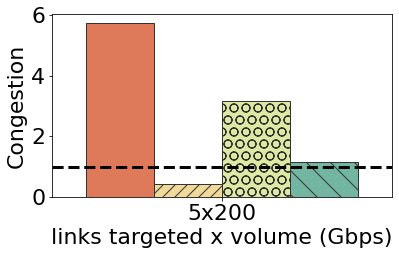

In [5]:
data = pd.read_csv("/home/mhall/network_stability_sim/bellCanada.csv")
plt.rc("font", size=22)
rot = 0
palette = "Spectral"
patches = ["", "//", "O", "\\"]

fig, axes = plt.subplots(figsize=(6, 4))
bellCanada_plot = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Congestion"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    edgecolor=".2",
)
bellCanada_plot.patches[0].set_hatch(patches[0])
bellCanada_plot.patches[1].set_hatch(patches[1])
bellCanada_plot.patches[2].set_hatch(patches[2])
bellCanada_plot.patches[3].set_hatch(patches[3])
bellCanada_plot.axhline(1, color="black", linestyle="--", linewidth=3)
my_legend = bellCanada_plot.legend(ncol=2, framealpha=1)
export_legend(my_legend, filename=SIM_HOME + "/bar_plot_congestion_legend")
bellCanada_plot.legend().remove()
bellCanada_plot.set_xlabel("links targeted x volume (Gbps)")
# axes[0].legend(loc="upper left", ncol=2, bbox_to_anchor=(0, 1.5), framealpha=1)
fig.tight_layout()
# plt.savefig(SIM_HOME + "/data/" + RES_FOLDER + "/plots/bellCanada_congestion.pdf")

FileNotFoundError: [Errno 2] No such file or directory: '/home/mhall/network_stability_sim/data/archive/results-03-10-2022/plots/surfNet_congestion.pdf'

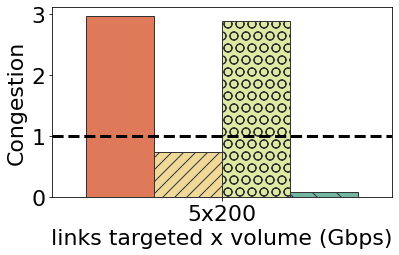

In [18]:
data = pd.read_csv("/home/mhall/network_stability_sim/surfNet.csv")
plt.rc("font", size=22)
rot = 0
fig, axes = plt.subplots(figsize=(6, 4))
surfnet_plot = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Congestion"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    edgecolor=".2",
)

surfnet_plot.patches[0].set_hatch(patches[0])
surfnet_plot.patches[1].set_hatch(patches[1])
surfnet_plot.patches[2].set_hatch(patches[2])
surfnet_plot.patches[3].set_hatch(patches[3])
surfnet_plot.axhline(1, color="black", linestyle="--", linewidth=3)
surfnet_plot.set_xlabel("links targeted x volume (Gbps)")
surfnet_plot.legend().remove()
fig.tight_layout()
plt.savefig(SIM_HOME + "/data/" + RES_FOLDER + "/plots/surfNet_congestion.pdf")

In [19]:
SIM_HOME + "/data/" + RES_FOLDER + "/plots/bellCanada_congestion.pdf"

'/home/mhall/network_stability_sim/data/archive/results-03-10-2022/plots/bellCanada_congestion.pdf'

/tmp/ipykernel_556421/2149937803.py:28: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_0 = sns.barplot(
/tmp/ipykernel_556421/2149937803.py:56: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_1 = sns.barplot(
/tmp/ipykernel_556421/2149937803.py:80: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_2 = sns.barplot(
/tmp/ipykernel_556421/2149937803.py:104: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_3 = sns.barplot(
/home/mhall/topology-programming/.venv/lib/python3.11/site-packages/seaborn/categorical.py:374: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(-.5, n - .5, auto=None)
/tmp/ipykernel_556421/2149937803.py:126: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same 

<Figure size 640x480 with 0 Axes>

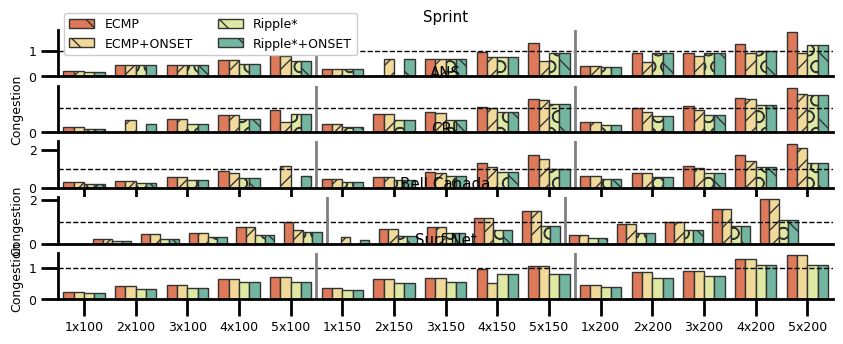

In [25]:
def set_patches(bar, patches):
    for i, thisbar in enumerate(bar.patches):
        # print(thisbar)
        # Set a different hatch for each bar
        # first set
        if i < 15:
            thisbar.set_hatch(patches[0])
        elif i < 30:
            thisbar.set_hatch(patches[1])
        elif i < 45:
            thisbar.set_hatch(patches[2])
        else:
            thisbar.set_hatch(patches[3])


patches = ["", "//", "O", "\\"]
plt.clf()
plt.rc("font", size=9)
rot = 0
fig, axes = plt.subplots(5, 1, figsize=(10, 3.5))

palette = "Spectral"

metrics = ["Congestion", "Loss", "Throughput"]


data = frames["sprint"]
bar_0 = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Congestion"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    ax=axes[0],
    edgecolor=".2",
)
set_patches(bar_0, patches)
axes[0].legend(
    ["ECMP", "ECMP+ONSET", "Ripple*", "Ripple*+ONSET"], loc="upper left", ncol=2, bbox_to_anchor=(0, 1.5), framealpha=1
)
axes[0].axhline(1, color="black", linestyle="--", linewidth=1)
axes[0].axvline(4.5, color="gray")
axes[0].axvline(9.5, color="gray")
axes[0].set_title("Sprint")
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_xticks([])


# plt.tight_layout()

data = frames["ANS"]
bar_1 = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Congestion"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    ax=axes[1],
    edgecolor=".2",
)
set_patches(bar_1, patches)
axes[1].legend([], [], frameon=False)
axes[1].axhline(1, color="black", linestyle="--", linewidth=1)
axes[1].axvline(4.5, color="gray")
axes[1].axvline(9.5, color="gray")
axes[1].set_title("ANS")
axes[1].set_xlabel("")
axes[1].set_xticks([])
# axes[1].tick_params('x', labelrotation=rot)
# plt.tight_layout()

data = frames["CRL"]
bar_2 = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Congestion"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    ax=axes[2],
    edgecolor=".2",
)
set_patches(bar_2, patches)
axes[2].legend([], [], frameon=False)
axes[2].axhline(1, color="black", linestyle="--", linewidth=1)
axes[2].axvline(4.5, color="gray")
axes[2].axvline(9.5, color="gray")
axes[2].set_title("CRL")
axes[2].tick_params("x", labelrotation=rot)
axes[2].set_ylabel("")
axes[2].set_xlabel("number of links targeted x volume per link (Gbps)")
axes[3].set_xticks([])

data = frames["bellCanada"]
bar_3 = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Congestion"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    ax=axes[3],
    edgecolor=".2",
)
set_patches(bar_3, patches)
axes[3].legend([], [], frameon=False)
axes[3].axhline(1, color="black", linestyle="--", linewidth=1)
axes[3].axvline(4.5, color="gray")
axes[3].axvline(9.5, color="gray")
axes[3].set_title("Bell Canada")
axes[3].set_xlabel("")
axes[3].set_xticks([])

data = frames["surfNet"]
bar_4 = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Congestion"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    ax=axes[4],
    edgecolor=".2",
)
set_patches(bar_3, patches)
axes[4].legend([], [], frameon=False)
axes[4].axhline(1, color="black", linestyle="--", linewidth=1)
axes[4].axvline(4.5, color="gray")
axes[4].axvline(9.5, color="gray")
axes[4].set_title("SurfNet")
axes[4].set_xlabel("")

my_ticks = np.array([0.0, 2.0, 5.0])

lim = axes[2].get_ylim()
axes[2].set_yticks(my_ticks)
axes[2].set_ylim(lim)

lim = axes[1].get_ylim()
axes[1].set_yticks(my_ticks)
axes[1].set_ylim(lim)

fig.tight_layout(h_pad=-0.3)
plt.savefig("congestion.pdf")
#     if i < len(bar_0.patches) / 6 :
#         thisbar.set_hatch('//')
#         thisbar.set_edgecolor('black')

#     elif (14 < i < 20):
#         thisbar.set_edgecolor('black')
#         thisbar.set_hatch('/')
#     # second set
#     elif (9 < i < 15):
#         thisbar.set_hatch('//')
#         thisbar.set_edgecolor('black')
#     elif (24 < i):
#         thisbar.set_edgecolor('black')
#     # last set:
#     elif (19 < i < 25):
#         thisbar.set_edgecolor('black')
#     else:
#         thisbar.set_edgecolor('black')
#         thisbar.set_hatch('o')

# plt.savefig(SIM_HOME + "/data/" + RES_FOLDER + "/plots/" + m + ".pdf")
# plt.savefig(SIM_HOME + "/data/" + RES_FOLDER + "/plots/" + m + ".png")

In [26]:
print("hello")

hello


<Figure size 432x288 with 0 Axes>

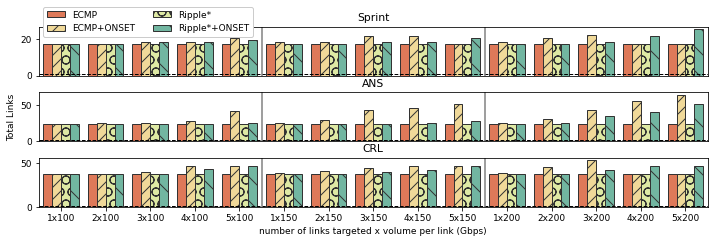

In [63]:
def set_patches(bar, patches):
    for i, thisbar in enumerate(bar.patches):
        # print(thisbar)
        # Set a different hatch for each bar
        # first set
        if i < 15:
            thisbar.set_hatch(patches[0])
        elif i < 30:
            thisbar.set_hatch(patches[1])
        elif i < 45:
            thisbar.set_hatch(patches[2])
        else:
            thisbar.set_hatch(patches[3])


plt.clf()
plt.rc("font", size=9)
rot = 0
fig, axes = plt.subplots(3, 1, figsize=(10, 3.5))

palette = "Spectral"

metrics = ["Congestion", "Loss", "Throughput"]


data = frames["sprint"]
bar_0 = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Total Links"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    ax=axes[0],
    edgecolor=".2",
)
set_patches(bar_0, patches)
axes[0].legend(
    ["ECMP", "ECMP+ONSET", "Ripple*", "Ripple*+ONSET"], loc="upper left", ncol=2, bbox_to_anchor=(0, 1.5), framealpha=1
)
axes[0].axhline(1, color="black", linestyle="--", linewidth=1)
axes[0].axvline(4.5, color="gray")
axes[0].axvline(9.5, color="gray")
axes[0].set_title("Sprint")
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_xticks([])


# plt.tight_layout()

data = frames["ANS"]
bar_1 = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Total Links"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    ax=axes[1],
    edgecolor=".2",
)
set_patches(bar_1, patches)
axes[1].legend([], [], frameon=False)
axes[1].axhline(1, color="black", linestyle="--", linewidth=1)
axes[1].axvline(4.5, color="gray")
axes[1].axvline(9.5, color="gray")
axes[1].set_title("ANS")
axes[1].set_xlabel("")
axes[1].set_xticks([])
# axes[1].tick_params('x', labelrotation=rot)
# plt.tight_layout()

data = frames["CRL"]
bar_2 = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Total Links"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    ax=axes[2],
    edgecolor=".2",
)
set_patches(bar_2, patches)
axes[2].legend([], [], frameon=False)
axes[2].axhline(1, color="black", linestyle="--", linewidth=1)
axes[2].axvline(4.5, color="gray")
axes[2].axvline(9.5, color="gray")
axes[2].set_title("CRL")
axes[2].tick_params("x", labelrotation=rot)
axes[2].set_ylabel("")
axes[2].set_xlabel("number of links targeted x volume per link (Gbps)")

# my_ticks = np.array([0. , 2., 5. ])

# lim = axes[2].get_ylim()
# axes[2].set_yticks(my_ticks)
# axes[2].set_ylim(lim)

# lim = axes[1].get_ylim()
# axes[1].set_yticks(my_ticks)
# axes[1].set_ylim(lim)

fig.tight_layout(h_pad=-0.3)
plt.savefig("FluxLinks.pdf")

In [7]:
from itertools import product
import os
import sys

sys.path.append(os.path.abspath("/home/mhall/network_stability_sim/"))
sys.path.append(os.path.abspath("/home/mhall/network_stability_sim/src"))
sys.path.append(os.path.abspath("/home/mhall/network_stability_sim/src/utilities"))
networks = ["ANS", "CRL", "sprint"]
n_link = ["1", "2", "3", "4", "5"]
volume = ["100", "150", "200"]
method = ["ecmp", "mcf"]
from src.utilities.plot_reconfig_time import read_result_val

frames = {network: pd.DataFrame() for network in networks}
base_folder = "/home/mhall/network_stability_sim/data/archive/results/results-03-10-2022/"

In [8]:
exp_file

NameError: name 'exp_file' is not defined

In [9]:
for i, x in enumerate(product(networks, volume, n_link, method)):
    # print(net, vol, n, m)
    net, vol, n, m = x
    exp_file = os.path.join(base_folder, "{0}_optimal_{2}_link_attack_100_0Gbps-{1}Gbps_-{3}".format(net, vol, n, m))
    # print("verifying", exp_file)
    assert os.path.exists(exp_file)

    base_congestion_file = os.path.join(exp_file, "{}_2-3".format(net), "MaxExpCongestionVsIterations.dat")
    base_loss_file = os.path.join(exp_file, "{}_2-3".format(net), "CongestionLossVsIterations.dat")
    base_throughput = os.path.join(exp_file, "{}_2-3".format(net), "TotalThroughputVsIterations.dat")
    onset_congestion_file = os.path.join(exp_file, "{}_3-3".format(net), "MaxExpCongestionVsIterations.dat")
    onset_loss_file = os.path.join(exp_file, "{}_3-3".format(net), "CongestionLossVsIterations.dat")
    onset_throughput_file = os.path.join(exp_file, "{}_3-3".format(net), "TotalThroughputVsIterations.dat")

    base_congestion_value = read_result_val(base_congestion_file)
    base_loss_value = read_result_val(base_loss_file)
    base_throughput_value = read_result_val(base_throughput)

    onset_congestion_value = read_result_val(onset_congestion_file)
    onset_loss_value = read_result_val(onset_loss_file)
    onset_throughput_value = read_result_val(onset_throughput_file)

    base_df = pd.DataFrame(
        {
            "Attack": "{}x{}".format(n, vol),
            "links": n,
            "volume": vol,
            "Defense": m.upper(),
            "Congestion": base_congestion_value,
            "Loss": base_loss_value,
            "Throughput": base_throughput_value,
        },
        index=[2 * i],
    )

    onset_df = pd.DataFrame(
        {
            "Attack": "{}x{}".format(n, vol),
            "links": n,
            "volume": vol,
            "Defense": m.upper() + "+ONSET",
            "Congestion": onset_congestion_value,
            "Loss": onset_loss_value,
            "Throughput": onset_throughput_value,
        },
        index=[2 * i + 1],
    )

    frames[net] = pd.concat([frames[net], base_df, onset_df])

In [10]:
total_losses = 0

tdf = frames["ANS"][frames["ANS"]["Loss"] > 0]

lossy = tdf[~tdf["Defense"].str.contains("ONSET")]

print(lossy)

total_losses += len(lossy)

tdf = frames["CRL"][frames["CRL"]["Loss"] > 0]

lossy = tdf[~tdf["Defense"].str.contains("ONSET")]

print(lossy)

total_losses += len(lossy)


tdf = frames["sprint"][frames["sprint"]["Loss"] > 0]
lossy = tdf[~tdf["Defense"].str.contains("ONSET")]

print(lossy)

total_losses += len(lossy)
total_losses

   Attack links volume Defense  Congestion      Loss  Throughput
4   2x100     2    100    ECMP    1.071419  0.038234    0.961766
8   3x100     3    100    ECMP    1.106249  0.037905    0.962095
12  4x100     4    100    ECMP    1.177889  0.048418    0.951582
16  5x100     5    100    ECMP    1.283182  0.060644    0.939356
18  5x100     5    100     MCF    1.038916  0.024988    0.975012
20  1x150     1    150    ECMP    1.017291  0.012328    0.987672
24  2x150     2    150    ECMP    1.607128  0.253312    0.746688
28  3x150     3    150    ECMP    1.659373  0.200671    0.799329
32  4x150     4    150    ECMP    1.766834  0.216015    0.783985
34  4x150     4    150     MCF    1.131318  0.093593    0.906407
36  5x150     5    150    ECMP    1.924773  0.285502    0.714498
38  5x150     5    150     MCF    1.558373  0.268988    0.731012
40  1x200     1    200    ECMP    1.356388  0.190569    0.809431
44  2x200     2    200    ECMP    2.142838  0.373054    0.626946
46  2x200     2    200   

64

In [11]:
total_losses = 0

tdf = frames["ANS"][frames["ANS"]["Loss"] > 0]

lossy = tdf[tdf["Defense"].str.contains("ONSET")]

print(lossy)

total_losses += len(lossy)

tdf = frames["CRL"][frames["CRL"]["Loss"] > 0]

lossy = tdf[tdf["Defense"].str.contains("ONSET")]

print(lossy)

total_losses += len(lossy)


tdf = frames["sprint"][frames["sprint"]["Loss"] > 0]
lossy = tdf[tdf["Defense"].str.contains("ONSET")]

print(lossy)

total_losses += len(lossy)
total_losses

   Attack links volume     Defense  Congestion      Loss  Throughput
41  1x200     1    200  ECMP+ONSET    1.071618  0.038296    0.961704
45  2x200     2    200  ECMP+ONSET    1.154867  0.041469    0.958531
    Attack links volume     Defense  Congestion      Loss  Throughput
69   3x100     3    100  ECMP+ONSET    1.025951  0.009232    0.990768
89   3x150     3    150  ECMP+ONSET    1.062891  0.014916    0.985084
93   4x150     4    150  ECMP+ONSET    1.068023  0.012103    0.987897
95   4x150     4    150   MCF+ONSET    1.002708  0.001730    0.998270
113  4x200     4    200  ECMP+ONSET    3.676390  0.609845    0.390155
117  5x200     5    200  ECMP+ONSET    4.179994  0.645475    0.354525
    Attack links volume     Defense  Congestion      Loss  Throughput
137  5x100     5    100  ECMP+ONSET    1.004654  0.000996    0.999004
157  5x150     5    150  ECMP+ONSET    1.596553  0.262400    0.737600
159  5x150     5    150   MCF+ONSET    1.006545  0.004672    0.995328
171  3x200     3    200

14

In [12]:
# def _plot_throughput(df,name):
#     plt.clf()
#     plt.figure(figsize=(6, 4))
#     sns.barplot(data=df, x="Attack", y="Throughput", hue="Defense", ci=None)
#     plt.xticks(rotation=30)
#     plt.xlabel("Links Targeted x Volume(Gbps)")
#     plt.ylabel("Throughput")
#     plt.legend(loc="lower left")
#     plt.subplots_adjust()
#     plt.savefig(name + "_throughput")
#     plt.savefig(name + "_throughput.pdf")

# def _plot_loss(df,name):
#     plt.clf()
#     plt.figure(figsize=(6, 4))
#     sns.barplot(data=df, x="Attack", y="Loss", hue="Defense", ci=None)
#     plt.xticks(rotation=30)
#     plt.xlabel("Links Targeted x Volume(Gbps)")
#     plt.ylabel("Throughput")
#     plt.legend(loc="upper left")
#     plt.subplots_adjust()
#     plt.savefig(name + "_loss")
#     plt.savefig(name + "_loss.pdf")


# def _plot_congestion(df,name):
#     plt.clf()
#     sns.barplot(data=df, x="Attack", y="Congestion", hue="Defense", ci=None)
#     plt.axhline(1, linestyle='--')
#     plt.xticks(rotation=30)
#     plt.xlabel("Links Targeted x Volume(Gbps)")
#     plt.ylabel("Max Link Congestion")
#     plt.legend(loc="upper left")
#     plt.subplots_adjust()
#     plt.savefig(name + "_congestion")
#     plt.savefig(name + "_congestion.pdf")

# def plot_bars(df, x, y, hue):
#     '''
#     0 (0.6509803921568628, 0.807843137254902, 0.8901960784313725)
#     1 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765)
#     2 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353)
#     3 (0.2, 0.6274509803921569, 0.17254901960784313)
#     4 (0.984313725490196, 0.6039215686274509, 0.6)
#     5 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745)
#     6 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883)
#     7 (1.0, 0.4980392156862745, 0.0)
#     8 (0.792156862745098, 0.6980392156862745, 0.8392156862745098)
#     9 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509)
#     10 (1.0, 1.0, 0.6)
#     11 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)
#     '''
#     plt.figure(figsize=(3, 2))
#     bar = sns.barplot(data=df, x=x, y=y, hue=hue, ci=None)
#     hatches = ['', '\\']
#     # Loop over the bars
#     for i, thisbar in enumerate(bar.patches):
#         # print(thisbar)
#         # Set a different hatch for each bar
#         # first set
#         if i < len(bar.patches) / 6 :
#             thisbar.set_facecolor((0.6509803921568628, 0.807843137254902, 0.8901960784313725))
#             thisbar.set_hatch('o')
#             thisbar.set_edgecolor('black')

#         elif (14 < i < 20):
#             thisbar.set_facecolor((0.12156862745098039, 0.47058823529411764, 0.7058823529411765))
#             thisbar.set_edgecolor('black')
#         # second set
#         elif (9 < i < 15):
#             thisbar.set_facecolor((0.6980392156862745, 0.8745098039215686, 0.5411764705882353))
#             thisbar.set_hatch('o')
#             thisbar.set_edgecolor('black')
#         elif (24 < i):
#             thisbar.set_facecolor((0.2, 0.6274509803921569, 0.17254901960784313))
#             thisbar.set_edgecolor('black')
#         # last set:
#         elif (19 < i < 25):
#             thisbar.set_facecolor((0.8901960784313725, 0.10196078431372549, 0.10980392156862745))
#             thisbar.set_edgecolor('black')
#         else:
#             thisbar.set_facecolor((0.984313725490196, 0.6039215686274509, 0.6))
#             thisbar.set_edgecolor('black')
#             thisbar.set_hatch('o')

# def plot_throughput(df,name):
#     plt.clf()
#     plot_bars(df, "Attack", "Throughput", "Defense")
#     plt.xticks(rotation=30)
#     plt.xlabel("Links Targeted x Volume(Gbps)")
#     plt.ylabel("Throughput")
#     plt.legend(loc="lower left", framealpha=1)
#     plt.tight_layout()
#     plt.savefig(name + "_throughput")
#     plt.savefig(name + "_throughput.pdf")

# def plot_loss(df,name):
#     plt.clf()
#     plt.figure(figsize=(6, 4))
#     plot_bars(df, "Attack", "Loss", "Defense")
#     plt.xticks(rotation=30)
#     plt.xlabel("Links Targeted x Volume(Gbps)")
#     plt.ylabel("Throughput")
#     plt.legend(loc="upper left",framealpha=1)
#     plt.tight_layout()
#     plt.savefig(name + "_loss")
#     plt.savefig(name + "_loss.pdf")

# def plot_congestion(df,name):
#     plt.clf()
#     plot_bars(df, "Attack", "Congestion", "Defense")
#     plt.axhline(1, linestyle='--')
#     plt.xticks(rotation=30)
#     plt.xlabel("Links Targeted x Volume(Gbps)")
#     plt.ylabel("Max Link Congestion")
#     plt.legend(loc="upper left", framealpha=1)
#     plt.tight_layout()
#     plt.savefig(name + "_congestion")
#     plt.savefig(name + "_congestion.pdf")

In [13]:
# # plot_throughput(frames["CRL"].query('"MCF" in Defense or "MCF+ONSET" in Defense'),"test")
# test_df = frames["CRL"].query('"MCF" in Defense or "MCF+ONSET" in Defense')
# test_df.loc[test_df["links"] != "1"]

In [14]:
# for net, defense in product(networks, ["MCF", "ECMP"]):
#     q = '"{0}" in Defense or "{0}+ONSET" in Defense and "links" != "1"'.format(defense)
#     temp_df = frames[net].query(q) # apply query.
#     # temp_df = test_df.loc[test_df["links"] != "1"] # surpress single ling attacks.
#     temp_df = test_df.loc[test_df["volume"] != "100"]
#     plot_throughput(temp_df, "./data/results/plots/150_and_200_Gbps_attacks_{}_{}".format(net, defense))
#     plot_loss(temp_df,       "./data/results/plots/150_and_200_Gbps_attacks_{}_{}".format(net, defense))
#     plot_congestion(temp_df, "./data/results/plots/150_and_200_Gbps_attacks_{}_{}".format(net, defense))

In [15]:
for i, c in enumerate(sns.color_palette("Paired")):
    print(i, c)

sns.color_palette("Paired")

0 (0.6509803921568628, 0.807843137254902, 0.8901960784313725)
1 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765)
2 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353)
3 (0.2, 0.6274509803921569, 0.17254901960784313)
4 (0.984313725490196, 0.6039215686274509, 0.6)
5 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745)
6 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883)
7 (1.0, 0.4980392156862745, 0.0)
8 (0.792156862745098, 0.6980392156862745, 0.8392156862745098)
9 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509)
10 (1.0, 1.0, 0.6)
11 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)


[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

In [16]:
# # frames["CRL"].query('"MCF" in Defense or "MCF+ONSET" in Defense'),"test")
# frames["CRL"]

# plt.figure(figsize=(12, 4))
# sns.lineplot(data=frames["ANS"], x='Attack', y='Congestion', hue='Defense', style='Defense', markers=True)
# plt.xticks(rotation=30, ha="right")
# plt.axhline(1, color='black')
# plt.legend(bbox_to_anchor=(0.01, 0.98), loc='upper left', borderaxespad=0, ncol=4)
# plt.tight_layout()
# plt.savefig("ANS_Congestion.pdf")
# plt.savefig("ANS_Congestion.png")

FileNotFoundError: [Errno 2] No such file or directory: '/home/mhall/network_stability_sim/data/archive/results-03-10-2022/plots/mcf.pdf'

<Figure size 432x288 with 0 Axes>

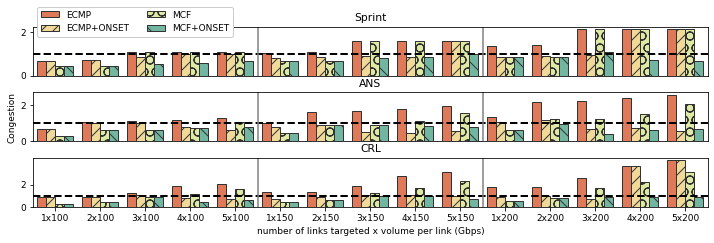

In [17]:
def set_patches(bar, patches):
    for i, thisbar in enumerate(bar.patches):
        # print(thisbar)
        # Set a different hatch for each bar
        # first set
        if i < 15:
            thisbar.set_hatch(patches[0])
        elif i < 30:
            thisbar.set_hatch(patches[1])
        elif i < 45:
            thisbar.set_hatch(patches[2])
        else:
            thisbar.set_hatch(patches[3])


plt.clf()
plt.rc("font", size=9)
rot = 0
fig, axes = plt.subplots(3, 1, figsize=(10, 3.5))

patches = ["", "//", "O", "\\"]
palette = "Spectral"

metrics = ["Congestion", "Loss", "Throughput"]

data = frames["sprint"]
bar_0 = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Congestion"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    ax=axes[0],
    edgecolor=".2",
)
set_patches(bar_0, patches)
axes[0].legend(loc="upper left", ncol=2, bbox_to_anchor=(0, 1.5), framealpha=1)
axes[0].axhline(1, color="black", linestyle="--", linewidth=2)
axes[0].axvline(4.5, color="gray")
axes[0].axvline(9.5, color="gray")
axes[0].set_title("Sprint")
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_xticks([])


# plt.tight_layout()

data = frames["ANS"]
bar_1 = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Congestion"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    ax=axes[1],
    edgecolor=".2",
)
set_patches(bar_1, patches)
axes[1].legend([], [], frameon=False)
axes[1].axhline(1, color="black", linestyle="--", linewidth=2)
axes[1].axvline(4.5, color="gray")
axes[1].axvline(9.5, color="gray")
axes[1].set_title("ANS")
axes[1].set_xlabel("")
axes[1].set_xticks([])
# axes[1].tick_params('x', labelrotation=rot)
# plt.tight_layout()

data = frames["CRL"]
bar_2 = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Congestion"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    ax=axes[2],
    edgecolor=".2",
)
set_patches(bar_2, patches)
axes[2].legend([], [], frameon=False)
axes[2].axhline(1, color="black", linestyle="--", linewidth=2)
axes[2].axvline(4.5, color="gray")
axes[2].axvline(9.5, color="gray")
axes[2].set_title("CRL")
axes[2].tick_params("x", labelrotation=rot)
axes[2].set_ylabel("")
axes[2].set_xlabel("number of links targeted x volume per link (Gbps)")

my_ticks = np.array([0.0, 2.0, 5.0])

lim = axes[2].get_ylim()
axes[2].set_yticks(my_ticks)
axes[2].set_ylim(lim)

lim = axes[1].get_ylim()
axes[1].set_yticks(my_ticks)
axes[1].set_ylim(lim)

fig.tight_layout(h_pad=-0.3)
#     if i < len(bar_0.patches) / 6 :
#         thisbar.set_hatch('//')
#         thisbar.set_edgecolor('black')

#     elif (14 < i < 20):
#         thisbar.set_edgecolor('black')
#         thisbar.set_hatch('/')
#     # second set
#     elif (9 < i < 15):
#         thisbar.set_hatch('//')
#         thisbar.set_edgecolor('black')
#     elif (24 < i):
#         thisbar.set_edgecolor('black')
#     # last set:
#     elif (19 < i < 25):
#         thisbar.set_edgecolor('black')
#     else:
#         thisbar.set_edgecolor('black')
#         thisbar.set_hatch('o')


plt.savefig(SIM_HOME + "/data/" + RES_FOLDER + "/plots/" + m + ".pdf")
plt.savefig(SIM_HOME + "/data/" + RES_FOLDER + "/plots/" + m + ".png")

In [32]:
RES_FOLDER

'archive/results-03-10-2022'

<Figure size 432x288 with 0 Axes>

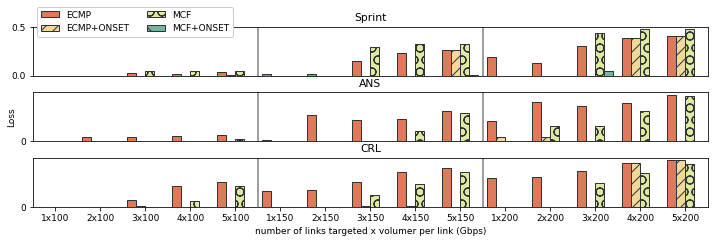

In [112]:
plt.clf()
plt.rc("font", size=9)
rot = 0
fig, axes = plt.subplots(3, 1, figsize=(10, 3.5))

patches = ["", "//", "O", "\\"]
palette = "Spectral"

metrics = ["Congestion", "Loss", "Throughput"]

data = frames["sprint"]
bar_0 = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Loss"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    ax=axes[0],
    edgecolor=".2",
)
set_patches(bar_0, patches)
axes[0].legend(loc="upper left", ncol=2, bbox_to_anchor=(0, 1.5), framealpha=1)

axes[0].axvline(4.5, color="gray")
axes[0].axvline(9.5, color="gray")
axes[0].set_title("Sprint")
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_xticks([])


# plt.tight_layout()

data = frames["ANS"]
bar_1 = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Loss"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    ax=axes[1],
    edgecolor=".2",
)
set_patches(bar_1, patches)
axes[1].legend([], [], frameon=False)

axes[1].axvline(4.5, color="gray")
axes[1].axvline(9.5, color="gray")
axes[1].set_title("ANS")
axes[1].set_xlabel("")
axes[1].set_xticks([])
# axes[1].tick_params('x', labelrotation=rot)
# plt.tight_layout()

data = frames["CRL"]
bar_2 = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Loss"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    ax=axes[2],
    edgecolor=".2",
)
set_patches(bar_2, patches)
axes[2].legend([], [], frameon=False)

axes[2].axvline(4.5, color="gray")
axes[2].axvline(9.5, color="gray")
axes[2].set_title("CRL")
axes[2].tick_params("x", labelrotation=rot)
axes[2].set_ylabel("")
axes[2].set_xlabel("number of links targeted x volumer per link (Gbps)")

my_ticks = np.array([0.0, 2.0, 5.0])

lim = axes[2].get_ylim()
axes[2].set_yticks(my_ticks)
axes[2].set_ylim(lim)

lim = axes[1].get_ylim()
axes[1].set_yticks(my_ticks)
axes[1].set_ylim(lim)

fig.tight_layout(h_pad=-0.3)
#     if i < len(bar_0.patches) / 6 :
#         thisbar.set_hatch('//')
#         thisbar.set_edgecolor('black')

#     elif (14 < i < 20):
#         thisbar.set_edgecolor('black')
#         thisbar.set_hatch('/')
#     # second set
#     elif (9 < i < 15):
#         thisbar.set_hatch('//')
#         thisbar.set_edgecolor('black')
#     elif (24 < i):
#         thisbar.set_edgecolor('black')
#     # last set:
#     elif (19 < i < 25):
#         thisbar.set_edgecolor('black')
#     else:
#         thisbar.set_edgecolor('black')
#         thisbar.set_hatch('o')


plt.savefig(SIM_HOME + "/data/" + RES_FOLDER + "/plots/loss.pdf")
plt.savefig(SIM_HOME + "/data/" + RES_FOLDER + "/plots/loss.png")

<Figure size 432x288 with 0 Axes>

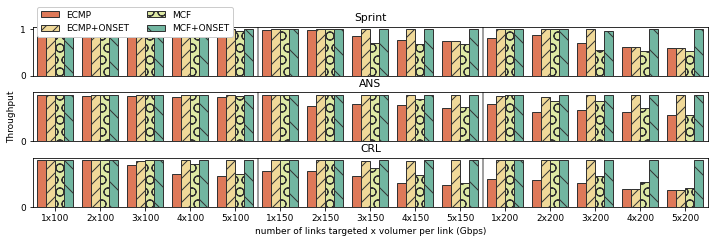

In [113]:
plt.clf()
plt.rc("font", size=9)
rot = 0
fig, axes = plt.subplots(3, 1, figsize=(10, 3.5))

patches = ["", "//", "O", "\\"]
palette = "Spectral"

metrics = ["Congestion", "Loss", "Throughput"]

data = frames["sprint"]
bar_0 = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Throughput"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    ax=axes[0],
    edgecolor=".2",
)
set_patches(bar_0, patches)
axes[0].legend(loc="upper left", ncol=2, bbox_to_anchor=(0, 1.5), framealpha=1)

axes[0].axvline(4.5, color="gray")
axes[0].axvline(9.5, color="gray")
axes[0].set_title("Sprint")
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_xticks([])


# plt.tight_layout()

data = frames["ANS"]
bar_1 = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Throughput"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    ax=axes[1],
    edgecolor=".2",
)
set_patches(bar_1, patches)
axes[1].legend([], [], frameon=False)

axes[1].axvline(4.5, color="gray")
axes[1].axvline(9.5, color="gray")
axes[1].set_title("ANS")
axes[1].set_xlabel("")
axes[1].set_xticks([])
# axes[1].tick_params('x', labelrotation=rot)
# plt.tight_layout()

data = frames["CRL"]
bar_2 = sns.barplot(
    data=data,
    x=data["Attack"],
    y=data["Throughput"],
    hue=data["Defense"],
    ci=None,
    palette=palette,
    linestyle="-",
    linewidth=1,
    ax=axes[2],
    edgecolor=".2",
)
set_patches(bar_2, patches)
axes[2].legend([], [], frameon=False)

axes[2].axvline(4.5, color="gray")
axes[2].axvline(9.5, color="gray")
axes[2].set_title("CRL")
axes[2].tick_params("x", labelrotation=rot)
axes[2].set_ylabel("")
axes[2].set_xlabel("number of links targeted x volumer per link (Gbps)")

my_ticks = np.array([0.0, 2.0, 5.0])

lim = axes[2].get_ylim()
axes[2].set_yticks(my_ticks)
axes[2].set_ylim(lim)

lim = axes[1].get_ylim()
axes[1].set_yticks(my_ticks)
axes[1].set_ylim(lim)

fig.tight_layout(h_pad=-0.3)
#     if i < len(bar_0.patches) / 6 :
#         thisbar.set_hatch('//')
#         thisbar.set_edgecolor('black')

#     elif (14 < i < 20):
#         thisbar.set_edgecolor('black')
#         thisbar.set_hatch('/')
#     # second set
#     elif (9 < i < 15):
#         thisbar.set_hatch('//')
#         thisbar.set_edgecolor('black')
#     elif (24 < i):
#         thisbar.set_edgecolor('black')
#     # last set:
#     elif (19 < i < 25):
#         thisbar.set_edgecolor('black')
#     else:
#         thisbar.set_edgecolor('black')
#         thisbar.set_hatch('o')


plt.savefig(SIM_HOME + "/data/" + RES_FOLDER + "/plots/throughput.pdf")
plt.savefig(SIM_HOME + "/data/" + RES_FOLDER + "/plots/throughput.png")

In [34]:
axes[2].get_ylim()

(0.0, 1.0)

In [35]:
x = np.arange(30)

In [36]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [37]:
y = np.random.randn(30)

/home/mhall/network_stability_sim/venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

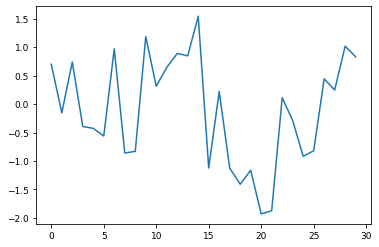

In [38]:
sns.lineplot(x, y)

In [39]:
print(SIM_HOME + "/data/" + RES_FOLDER + "/plots/congestion.png".format(net))

/home/mhall/network_stability_sim/data/results-03-10-2022/plots/congestion.png


In [1]:
frames

NameError: name 'frames' is not defined